This is the template for the image recognition exercise. <Br>
Some **general instructions**, read these carefully:
 - The final assignment is returned as a clear and understandable *report*
    - define shortly the concepts and explain the phases you use
    - use the Markdown feature of the notebook for larger explanations
 - return your output as a *working* Jupyter notebook
 - name your file as Exercise_MLPR2023_Partx_uuid.jpynb
    - use the uuid code determined below
    - use this same code for each part of the assignment
 - write easily readable code with comments     
     - if you exploit code from web, provide a reference
 - it is ok to discuss with a friend about the assignment. But it is not ok to copy someone's work. Everyone should submit their own implementation
     - in case of identical submissions, both submissions are failed 

**Deadlines:**
- Part 1: Mon 6.2 at 23:59
- Part 2: Mon 20.2 at 23:59
- Part 3: Mon 6.3 at 23:59

**No extensions for the deadlines** <br>
- after each deadline, example results are given, and it is not possible to submit anymore

**If you encounter problems, Google first and if you can’t find an answer, ask for help**
- Moodle area for questions
- pekavir@utu.fi
- teacher available for questions
    - Monday 30.1 at 14:00-15:00 room 407B Honka (Agora 4th floor)
    - Monday 13.2 at 14:00-15:00 room 407B Honka (Agora 4th floor)
    - Thursday 2.3 at lecture 10:15-12:00 

**Grading**

The exercise covers a part of the grading in this course. The course exam has 5 questions, 6 points of each. Exercise gives 6 points, i.e. the total score is 36 points.

From the template below, you can see how many exercise points can be acquired from each task. Exam points are given according to the table below: <br>
<br>
7 exercise points: 1 exam point <br>
8 exercise points: 2 exam points <br>
9 exercise points: 3 exam points <br>
10 exercise points: 4 exam points <br>
11 exercise points: 5 exam points <br>
12 exercise points: 6 exam points <br>
<br>
To pass the exercise, you need at least 7 exercise points, and at least 1 exercise point from each Part.
    
Each student will grade one submission from a peer and their own submission. After each Part deadline, example results are given. Study them carefully and perform the grading according to the given instructions. Mean value from the peer grading and self-grading is used for the final points. 

In [2]:
import uuid
# Run this cell only once and save the code. Use the same id code for each Part.
# Printing random id using uuid1()
print ("The id code is: ",end="")
print ('73e94c3f-a547-11ed-a26a-38fc986e2b5b')

#73e94c3f-a547-11ed-a26a-38fc986e2b5b

The id code is: 73e94c3f-a547-11ed-a26a-38fc986e2b5b


# Part 1

Read the original research article:

İ. Çınar and M. Koklu. Identification of rice varieties using machine learning algorithms. Journal of Agricultural Sciences, 28(2):307–325, 2022. doi: 10.15832/ankutbd.862482.

https://dergipark.org.tr/en/download/article-file/1513632

## Introduction (1 p)

Will be written in Part 3

## Preparations of the data (1 p)

Make three folders in your working folder: "notebooks", "data" and "training_data". Save this notebook in "notebooks" folder.
<br> <br>
Perform preparations for the data
- import all the packages needed for this notebook in one cell 
- import the images. Data can be found from (downloading starts as you press the link) https://www.muratkoklu.com/datasets/vtdhnd09.php <br>
    - save the data folders "Arborio", "Basmati" and "Jasmine" in "data" folder 
- take a random sample of 100 images from Arborio, Basmati and Jasmine rice species (i.e. 300 images in total) 
- determine the contour of each rice (you can use e.g. *findContours* from OpenCV) 
- plot one example image of each rice species, including the contour 

## Feature extraction (2 p)

Gather the feature data <br>
<br>
Color features (15) <br>
- Calculate the following color features for each image, including only the pixels within the contour (you can use e.g. *pointPolygonTest* from OpenCV)
    - Mean for each RGB color channel 
    - Variance for each RGB color channel 
    - Skewness for each RGB color channel 
    - Kurtosis for each RGB color channel 
    - Entropy for each RGB color channel 
    
Dimension features (6) <br>
- Fit an ellipse to the contour points (you can use e.g. *fitEllipse* from OpenCV) 
- Plot one example image of each rice species including the fitted ellipse 
- Calculate the following features for each image (for details, see the original article)
    - the major axis length the ellipse 
    - the minor axis length of the ellipse 
    - area inside the contour (you can use e.g. *contourArea* from OpenCV) 
    - perimeter of the contour (you can use e.g. *arcLength* from OpenCV) 
    - roundness 
    - aspect ratio 
    
Gather all the features in one array or dataframe: one data point in one row, including all feature values in columns.  <br>
For each data point, include also information of the original image and the label (rice species). Save the data in "training_data" folder. 

## Imports

In [55]:
from matplotlib import pyplot as plt
import glob, random
import cv2
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import entropy

# Preparation

## Helper Funtions

In [56]:
# https://www.educba.com/opencv-findcontours/

# we get the path name as a parameter
# return an image object 
def drawContours(path): 
    #read image
    img = cv2.imread(path)
    
    #make a copy
    img_cont = img.copy()
    
    #maka grayscale to get right type of image for threshold
    img_gray = cv2.cvtColor(img_cont, cv2.COLOR_BGR2GRAY)
    
    #thresh for getting contours
    ret, thresh = cv2.threshold(img_gray, 127, 255, 0)

    #get contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    #draw the contours on an image
    cv2.drawContours(img_cont, contours, -1,(0,2550,0),3)

    #return the image
    return img_cont


In [57]:
#same as above funtion with out the drawing 

# get path name as patrameter 
# return contours list
def getContours(path): 
    
    img = cv2.imread(path)
    img_cont = img.copy()
    img_gray = cv2.cvtColor(img_cont, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(img_gray, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    
    #retuyrn the list of contour info
    return contours

## Sampling

In [58]:
# initialize path names
file_path_arborio = ["../data/Arborio/*.jpg"]
file_path_basmati = ["../data/Basmati/*.jpg"]
file_path_jasmine = ["../data/Jasmine/*.jpg"]

In [59]:
#choose random images arborio

##add all folders file names to a list
arborio_images = glob.glob(random.choice(file_path_arborio))

##sample the list
arborio = random.sample(arborio_images, 100)

In [60]:
#choose random images basmati
basmati_images = glob.glob(random.choice(file_path_basmati))
basmati = random.sample(basmati_images, 100)

In [61]:
#choose random images jasmine
jasmine_images = glob.glob(random.choice(file_path_jasmine))
jasmine = random.sample(jasmine_images, 100)

## Contours

In [62]:
##initialize an empty array for saving all samples contour info
arborio_contours = []

##forloop from 0 to 100(AKA the lenth of sample array)
for i in range(len(arborio)):
    
    ## get countours of sample with helper function
    contours = getContours(arborio[i])
    
    ##add to array
    arborio_contours.append(contours)

In [63]:
# saving all samples contour info
basmati_contours = []
for i in range(len(basmati)):
    contours = getContours(basmati[i])
    basmati_contours.append(contours)

In [64]:
# saving all samples contour info
jasmine_contours = []
for i in range(len(jasmine)):
    contours = getContours(jasmine[i])
    jasmine_contours.append(contours)

### Visualize contours

Text(0.5, 1.0, 'Jamine, sample: 13')

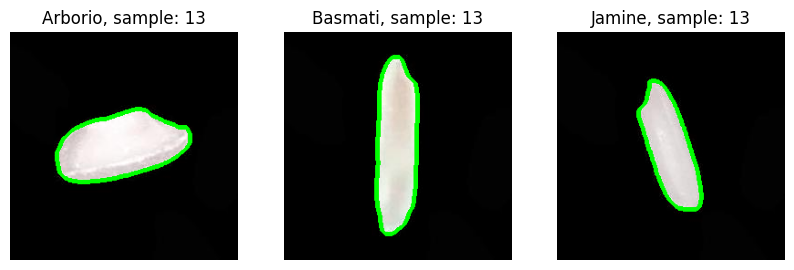

In [65]:
# create figure
fig = plt.figure(figsize=(10, 7))

j = random.randint(0,len(arborio)-1)

# setting values to rows and column variables
rows = 2
columns = 3

#contours 
arborio_img_contours = drawContours(arborio[j])
basmati_img_contours = drawContours(basmati[j])
jasmine_img_contours = drawContours(jasmine[j])

# Adds a subplot at the 1 position
fig.add_subplot(rows, columns, 1)
# showing with contours
plt.imshow(arborio_img_contours)
plt.axis('off')
plt.title("Arborio, sample: " + str(j))

# Adds a subplot at the 2 position
fig.add_subplot(rows, columns, 2)
# showing with contours
plt.imshow(basmati_img_contours)
plt.axis('off')
plt.title("Basmati, sample: " + str(j))

# Adds a subplot at the 3 position
fig.add_subplot(rows, columns, 3)
# showing with contours
plt.imshow(jasmine_img_contours)
plt.axis('off')
plt.title("Jamine, sample: " + str(j))

# Features

## Helper functions

In [66]:
# get all pixels with in contour
def getPixels(img, img_contours_list, c):
    
    # array for storing the pixels that are within the contour 
    rice_pixels = []

    width = img.shape[0]
    height = img.shape[1]

    #loop throught width
    for i in range(width):

        #loop through height
        for j in range(height):

            #add to list if pixel with in contour
            #matixes so the heigh first
            if (cv2.pointPolygonTest(img_contours_list[c][0],(j,i),False) > -1):
                rice_pixels.append([i,j])
    
    return rice_pixels

In [67]:
#uses parameters sample list and index to 
#return a dataframe of bgr values (in that order: blue green red)

def getRGBdataframe(sample_list, contours, c):
    #get width and height of image
    img = cv2.imread(sample_list[c])
    
    # get pixels of rice 
    pixels_list = getPixels(img, contours, c)
    #initialize arrays for storing rgb values
    bgr = []
    
    #loop trough rice pixels and add rgb info to coresponding arrays
    for p in pixels_list:
    
        height = p[1]
        width = p[0]

        #https://docs.opencv.org/4.x/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56
        #documentation tells us the chanel order is BGR 
        #np array type so width first here
        bgr.append(img[width][height].astype('int32'))
        
    return pd.DataFrame(bgr)

In [68]:
# https://www.tutorialspoint.com/how-to-fit-the-ellipse-to-an-object-in-an-image-using-opencv-python
def getEllipse(contours_list, c):
    
    ## get contour point
    points = contours_list[c][0]

    ## fit ellipse to the contour points
    ellipse = cv2.fitEllipse(points)
    
    return ellipse

In [69]:
def getEntropy(bgr):
    # calculate the probabilities for each color level
    entro = []
    for channel in range(3):
        ps = []
        for level in range(0, 256):
            ps.append(np.where(np.array(bgr[channel]) == level)[0].shape[0] / np.array(bgr[channel]).shape[0])

        entr = entropy(ps, base=2)

        entro.append(entr)
    return entro

## Color features

- Mean for each RGB color channel
- Variance for each RGB color channel
- Skewness for each RGB color channel
- Kurtosis for each RGB color channel
- Entropy for each RGB color channel

In [70]:
cols = ['rice_type', 'path', 'r_mean', 'g_mean', 'b_mean', 'r_variance', 'g_variance', 'b_variance', 'r_skewness', 'g_skewness', 'b_skewness', 'r_kurtosis', 'g_kurtosis', 'b_kurtosis', 'r_entropy', 'g_entropy', 'b_entropy']

In [71]:
arborio_color_features = pd.DataFrame(columns=cols)

#loop trough the arborio samples' contours lists

for c in range(len(arborio)): 
    
    bgr = getRGBdataframe(arborio, arborio_contours, c)
    
    mean = bgr.mean()
    variance = bgr.var()
    skewness = bgr.skew()
    kurtosis = bgr.kurt()
    e = getEntropy(bgr)
    
    row = ['arborio', arborio[c], mean[2], mean[1], mean[0], variance[2], variance[1], variance[0], skewness[2], skewness[1], skewness[0], kurtosis[2], kurtosis[1], kurtosis[0], e[2], e[1], e[0]] 
    arborio_color_features.loc[len(arborio_color_features.index)] = row
print('done')

done


In [72]:
arborio_color_features

,rice_type,path,r_mean,g_mean,b_mean,r_variance,g_variance,b_variance,r_skewness,g_skewness,b_skewness,r_kurtosis,g_kurtosis,b_kurtosis,r_entropy,g_entropy,b_entropy
0,arborio,../data/Arborio\Arborio (9204).jpg,222.522289,222.462998,224.158894,414.157721,420.233364,331.755208,-1.451926,-1.451582,-1.734442,2.459159,2.438715,3.853837,6.031748,6.041130,5.840202
1,arborio,../data/Arborio\Arborio (95).jpg,225.105370,225.438161,231.659615,441.078683,460.979968,397.579497,-1.039958,-0.999778,-1.265919,1.345513,1.178096,2.295804,6.098831,6.128041,5.903111
2,arborio,../data/Arborio\Arborio (6523).jpg,207.078867,208.550371,218.762061,317.646307,338.739471,344.251594,-0.909045,-0.852550,-1.015015,1.196146,1.042780,1.606971,5.986432,6.035016,6.021399
3,arborio,../data/Arborio\Arborio (7523).jpg,196.267586,195.825107,205.800233,207.988053,209.938308,231.463681,-1.117349,-1.113135,-1.210542,2.297675,2.235928,2.283707,5.726940,5.732542,5.769262
4,arborio,../data/Arborio\Arborio (11106).jpg,200.921386,200.854356,203.404185,296.996302,299.498530,290.685397,-0.693292,-0.694011,-0.724735,0.366932,0.349761,0.476972,5.963724,5.970757,5.946620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,arborio,../data/Arborio\Arborio (12273).jpg,198.262805,200.786360,209.346207,212.539197,223.251708,231.806162,-0.957651,-1.017964,-1.121216,2.139122,2.264802,2.572999,5.683725,5.717202,5.737457
96,arborio,../data/Arborio\Arborio (7761).jpg,225.931030,225.442572,231.891375,293.311815,297.152403,268.987491,-1.578380,-1.568824,-1.828947,4.212441,4.079405,5.375810,5.827214,5.821730,5.668346
97,arborio,../data/Arborio\Arborio (3733).jpg,231.331059,231.173326,232.867047,282.630847,287.231023,266.350046,-2.265778,-2.245267,-2.364349,8.066650,7.888180,8.903406,5.715695,5.727219,5.640143
98,arborio,../data/Arborio\Arborio (2582).jpg,220.612376,220.732502,228.608501,361.124163,384.985600,319.302323,-1.292103,-1.236573,-1.548884,1.839629,1.603701,3.046114,5.856105,5.903212,5.711808


In [73]:
basmati_color_features = pd.DataFrame(columns=cols)

#loop trough the basmati samples' contours lists

for c in range(len(basmati)): 
    
    bgr = getRGBdataframe(basmati, basmati_contours, c)
    
    mean = bgr.mean()
    variance = bgr.var()
    skewness = bgr.skew()
    kurtosis = bgr.kurt()
    e = getEntropy(bgr)
    
    row = ['basmati', basmati[c], mean[2], mean[1], mean[0], variance[2], variance[1], variance[0], skewness[2], skewness[1], skewness[0], kurtosis[2], kurtosis[1], kurtosis[0], e[2], e[1], e[0]] 
    basmati_color_features.loc[len(basmati_color_features.index)] = row
print('done')

done


In [74]:
basmati_color_features

,rice_type,path,r_mean,g_mean,b_mean,r_variance,g_variance,b_variance,r_skewness,g_skewness,b_skewness,r_kurtosis,g_kurtosis,b_kurtosis,r_entropy,g_entropy,b_entropy
0,basmati,../data/Basmati\basmati (3289).jpg,217.841394,221.503224,240.331473,274.429386,266.822760,148.898049,-0.105919,-0.264220,-3.775615,2.038861,2.489633,24.076612,5.697731,5.674051,4.846200
1,basmati,../data/Basmati\basmati (13074).jpg,209.324543,207.836671,236.138574,226.682790,233.760705,252.426428,-1.306195,-1.186701,-2.750285,4.648977,4.295917,10.003247,5.737779,5.771227,5.338798
2,basmati,../data/Basmati\basmati (350).jpg,210.989240,221.553463,223.988837,251.245781,228.298022,181.545880,-0.519574,-1.087226,-1.954691,2.281889,4.423662,9.881844,5.931611,5.768953,5.434844
3,basmati,../data/Basmati\basmati (13704).jpg,223.937011,224.003133,232.901320,439.114192,459.976045,299.418929,-0.676956,-0.673462,-1.707884,0.801564,0.635723,5.897792,6.116880,6.136207,5.613804
4,basmati,../data/Basmati\basmati (11277).jpg,222.020337,219.883394,238.640674,305.796313,319.982189,219.569269,-0.701213,-0.589530,-2.732051,2.612624,2.088057,12.470329,5.905094,5.963693,5.107795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,basmati,../data/Basmati\basmati (10946).jpg,210.485261,212.588137,230.250030,337.472300,332.311728,236.942371,-0.119968,-0.191489,-1.768235,0.804192,0.958146,7.185599,6.036442,6.055151,5.496957
96,basmati,../data/Basmati\basmati (9879).jpg,227.280702,226.379957,243.177602,341.035246,355.978678,217.318051,-0.976250,-0.923210,-3.431104,2.448812,2.128162,16.419965,5.891190,5.887498,4.812137
97,basmati,../data/Basmati\basmati (11682).jpg,212.721583,215.867986,239.238129,317.828568,335.486796,240.324648,-0.488180,-0.508428,-2.616512,1.636941,1.505523,10.537390,6.043834,6.085405,5.261840
98,basmati,../data/Basmati\basmati (9451).jpg,221.352867,222.941020,241.034984,272.000517,272.853790,245.370887,-1.384214,-1.531819,-3.552989,5.914245,6.309730,16.027226,5.702003,5.700188,4.927466


In [75]:
jasmine_color_features = pd.DataFrame(columns=cols)

#loop trough the jasmine samples' contours lists

for c in range(len(jasmine)): 
    
    bgr = getRGBdataframe(jasmine, jasmine_contours, c)
    
    mean = bgr.mean()
    variance = bgr.var()
    skewness = bgr.skew()
    kurtosis = bgr.kurt()
    e = getEntropy(bgr)
    
    row = ['jasmine', jasmine[c], mean[2], mean[1], mean[0], variance[2], variance[1], variance[0], skewness[2], skewness[1], skewness[0], kurtosis[2], kurtosis[1], kurtosis[0], e[2], e[1], e[0]] 
    jasmine_color_features.loc[len(jasmine_color_features.index)] = row
print('done')

done


In [76]:
jasmine_color_features

,rice_type,path,r_mean,g_mean,b_mean,r_variance,g_variance,b_variance,r_skewness,g_skewness,b_skewness,r_kurtosis,g_kurtosis,b_kurtosis,r_entropy,g_entropy,b_entropy
0,jasmine,../data/Jasmine\Jasmine (3877).jpg,224.426379,225.720862,236.926768,167.967184,162.339203,162.087700,-1.863364,-2.250491,-3.154835,11.514414,13.439211,17.552657,5.316986,5.249165,5.054972
1,jasmine,../data/Jasmine\Jasmine (14899).jpg,197.843135,221.656365,231.734297,180.458046,222.034114,212.915162,-0.667625,-1.197322,-1.719789,2.334855,3.781207,5.263512,5.677347,5.697279,5.575503
2,jasmine,../data/Jasmine\Jasmine (1631).jpg,191.416262,193.960994,199.969144,118.157243,122.382601,127.968574,-1.441720,-1.737628,-1.879451,8.103155,8.838036,9.429819,5.070669,5.051052,5.034177
3,jasmine,../data/Jasmine\Jasmine (7921).jpg,230.765302,231.814591,239.791815,299.099383,314.121873,303.486817,-2.634190,-2.574202,-3.014253,9.472115,9.054135,11.305894,5.605682,5.644382,5.233225
4,jasmine,../data/Jasmine\Jasmine (5171).jpg,227.458698,229.192803,242.190379,192.013354,194.740142,197.887472,-2.764438,-2.861757,-3.723002,13.868746,14.327292,18.508245,5.326224,5.301333,4.883946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,jasmine,../data/Jasmine\Jasmine (13804).jpg,200.134221,223.463011,229.026324,184.737862,236.712966,219.755707,-1.333591,-1.739588,-1.940014,3.419652,4.791636,5.922581,5.631196,5.702666,5.614750
96,jasmine,../data/Jasmine\Jasmine (10168).jpg,195.391452,203.778196,218.171719,202.511708,218.681114,250.159584,-1.493984,-1.758450,-2.072760,4.958828,5.438219,6.520122,5.619458,5.633035,5.638907
97,jasmine,../data/Jasmine\Jasmine (3730).jpg,196.107746,209.277900,232.575991,156.312420,158.743393,170.782181,-0.526102,-1.537868,-2.657842,6.154556,9.094669,12.707657,5.294636,5.280521,5.149777
98,jasmine,../data/Jasmine\Jasmine (14772).jpg,209.955983,237.643229,245.361751,132.449174,149.022144,149.207049,-1.585528,-3.542001,-4.341674,9.682699,18.571819,23.555238,5.198947,4.957931,4.538750


## Dimenssion features
- Fit an ellipse to the contour points (you can use e.g. fitEllipse from OpenCV)
- Plot one example image of each rice species including the fitted ellipse <br><br>
Calculate the following features for each image (for details, see the original article)
- the major axis length the ellipse
- the minor axis length of the ellipse
- area inside the contour (you can use e.g. contourArea from OpenCV)
- perimeter of the contour (you can use e.g. arcLength from OpenCV)
- roundness
- aspect ratio

### Visualize ellipses

Text(0.5, 1.0, 'Jamine, sample: 38')

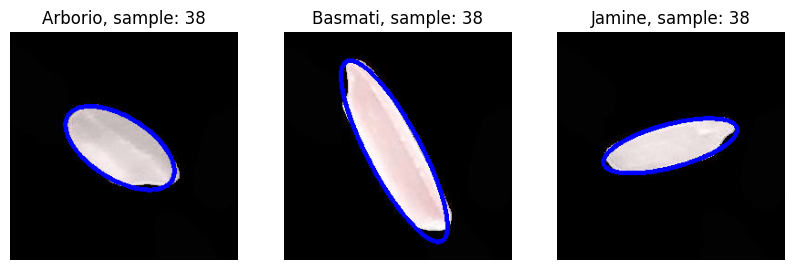

In [77]:
# create figure
fig = plt.figure(figsize=(10, 7))

j = random.randint(0,len(arborio)-1)

# setting values to rows and column variables
rows = 2
columns = 3

#ellipses
arborio_ellipse = getEllipse(arborio_contours, j)
basmati_ellipse = getEllipse(basmati_contours, j)
jasmine_ellipse = getEllipse(jasmine_contours, j)

#images
arborio_img = cv2.imread(arborio[j])
basmati_img = cv2.imread(basmati[j])
jasmine_img = cv2.imread(jasmine[j])

#add ellipses to images 
cv2.ellipse(arborio_img,arborio_ellipse, (0,0,255), 3)
cv2.ellipse(basmati_img,basmati_ellipse, (0,0,255), 3)
cv2.ellipse(jasmine_img,jasmine_ellipse, (0,0,255), 3)

# Adds a subplot at the 1 position
fig.add_subplot(rows, columns, 1)
# showing with contours
plt.imshow(arborio_img)
plt.axis('off')
plt.title("Arborio, sample: " + str(j))

# Adds a subplot at the 2 position
fig.add_subplot(rows, columns, 2)
# showing with contours
plt.imshow(basmati_img)
plt.axis('off')
plt.title("Basmati, sample: " + str(j))

# Adds a subplot at the 3 position
fig.add_subplot(rows, columns, 3)
# showing with contours
plt.imshow(jasmine_img)
plt.axis('off')
plt.title("Jamine, sample: " + str(j))

### Calculate

In [78]:
cols = ['path', 'major_axis_length (px)', 'minor_axis_lenth (px)', 'contour_area (px)', 'contour_perimeter (px)', 'roundness', 'aspect_ratio']

In [79]:
arborio_dimenssion_features = pd.DataFrame(columns=cols)

#loop trough the arborio samples' contours lists
for c in range(len(arborio)): 
    
    ellipse = getEllipse(arborio_contours, c)
    # https://stackoverflow.com/questions/62698756/opencv-calculating-orientation-angle-of-major-and-minor-axis-of-ellipse
    # The first answear in this question says that fitEllipse returns these values in this order
    (center_x, center_y), (minor_diameter, major_diameter), rotation = ellipse
    
    area = cv2.contourArea(arborio_contours[c][0])
    
    perimeter = cv2.arcLength(arborio_contours[c][0],True)
    
    # based on paper definition 
    # roundness = (4*area*pi)/(perimeter*perimeter)
    roundness = (4*area*np.pi)/(perimeter*perimeter)
    
    aspect_ratio = major_diameter / minor_diameter
    
    row = [arborio[c], major_diameter, minor_diameter, area, perimeter, roundness, aspect_ratio] 
    
    arborio_dimenssion_features.loc[len(arborio_dimenssion_features.index)] = row

print('done')

done


In [80]:
arborio_dimenssion_features

,path,major_axis_length (px),minor_axis_lenth (px),contour_area (px),contour_perimeter (px),roundness,aspect_ratio
0,../data/Arborio\Arborio (9204).jpg,129.655731,66.700142,6648.0,343.220343,0.709177,1.943860
1,../data/Arborio\Arborio (95).jpg,135.751190,69.416695,7221.0,357.019333,0.711908,1.955599
2,../data/Arborio\Arborio (6523).jpg,142.041885,73.650620,8065.5,378.433546,0.707721,1.928591
3,../data/Arborio\Arborio (7523).jpg,112.533409,57.882843,5013.5,295.722870,0.720412,1.944158
4,../data/Arborio\Arborio (11106).jpg,144.727615,74.547760,8303.0,377.102593,0.733712,1.941408
...,...,...,...,...,...,...,...
95,../data/Arborio\Arborio (12273).jpg,136.970352,67.248360,7144.0,355.421354,0.710664,2.036784
96,../data/Arborio\Arborio (7761).jpg,139.683533,64.233421,6905.0,349.764500,0.709287,2.174624
97,../data/Arborio\Arborio (3733).jpg,134.609070,67.241043,7036.0,346.676187,0.735678,2.001888
98,../data/Arborio\Arborio (2582).jpg,142.836716,74.525543,8091.0,382.534052,0.694819,1.916614


In [81]:
basmati_dimenssion_features = pd.DataFrame(columns=cols)

#loop trough the arborio samples' contours lists
for c in range(len(basmati)): 
    
    ellipse = getEllipse(basmati_contours, c)
    # https://stackoverflow.com/questions/62698756/opencv-calculating-orientation-angle-of-major-and-minor-axis-of-ellipse
    # The first answear in this question says that fitEllipse returns these values in this order
    (center_x, center_y), (minor_diameter, major_diameter), rotation = ellipse
    
    area = cv2.contourArea(basmati_contours[c][0])
    
    perimeter = cv2.arcLength(basmati_contours[c][0],True)
    
    # based on paper definition 
    # roundness = (4*area*pi)/(perimeter*perimeter)
    roundness = (4*area*np.pi)/(perimeter*perimeter)
    
    aspect_ratio = major_diameter / minor_diameter
    
    row = [basmati[c], major_diameter, minor_diameter, area, perimeter, roundness, aspect_ratio] 
    
    basmati_dimenssion_features.loc[len(basmati_dimenssion_features.index)] = row

print('done')

done


In [82]:
basmati_dimenssion_features

,path,major_axis_length (px),minor_axis_lenth (px),contour_area (px),contour_perimeter (px),roundness,aspect_ratio
0,../data/Basmati\basmati (3289).jpg,215.706039,49.766685,7859.5,460.433546,0.465877,4.334346
1,../data/Basmati\basmati (13074).jpg,228.744064,46.372627,7824.5,477.948265,0.430432,4.932739
2,../data/Basmati\basmati (350).jpg,220.616745,43.535076,7247.5,467.026473,0.417556,5.067563
3,../data/Basmati\basmati (13704).jpg,232.070496,50.069305,8729.0,496.357426,0.445231,4.634985
4,../data/Basmati\basmati (11277).jpg,218.720245,49.574345,8098.0,476.676187,0.447858,4.411964
...,...,...,...,...,...,...,...
95,../data/Basmati\basmati (10946).jpg,232.698746,48.341286,8171.5,496.256921,0.416964,4.813665
96,../data/Basmati\basmati (9879).jpg,236.594040,46.294926,8130.0,485.553385,0.433338,5.110583
97,../data/Basmati\basmati (11682).jpg,178.673874,40.609943,5398.5,381.889390,0.465166,4.399757
98,../data/Basmati\basmati (9451).jpg,202.639847,50.799896,7735.0,443.528999,0.494113,3.988982


In [83]:
jasmine_dimenssion_features = pd.DataFrame(columns=cols)

#loop trough the arborio samples' contours lists
for c in range(len(jasmine)): 
    
    ellipse = getEllipse(jasmine_contours, c)
    # https://stackoverflow.com/questions/62698756/opencv-calculating-orientation-angle-of-major-and-minor-axis-of-ellipse
    # The first answear in this question says that fitEllipse returns these values in this order
    (center_x, center_y), (minor_diameter, major_diameter), rotation = ellipse
    
    area = cv2.contourArea(jasmine_contours[c][0])
    
    perimeter = cv2.arcLength(jasmine_contours[c][0],True)
    
    # based on paper definition 
    # roundness = (4*area*pi)/(perimeter*perimeter)
    roundness = (4*area*np.pi)/(perimeter*perimeter)
    
    aspect_ratio = major_diameter / minor_diameter
    
    row = [jasmine[c], major_diameter, minor_diameter, area, perimeter, roundness, aspect_ratio] 
    
    jasmine_dimenssion_features.loc[len(jasmine_dimenssion_features.index)] = row

print('done')

done


In [84]:
jasmine_dimenssion_features

,path,major_axis_length (px),minor_axis_lenth (px),contour_area (px),contour_perimeter (px),roundness,aspect_ratio
0,../data/Jasmine\Jasmine (3877).jpg,150.705383,44.713093,4997.0,329.823375,0.577240,3.370498
1,../data/Jasmine\Jasmine (14899).jpg,210.644257,54.885223,8783.0,460.936073,0.519483,3.837905
2,../data/Jasmine\Jasmine (1631).jpg,140.787567,47.085163,5008.0,328.592927,0.582851,2.990062
3,../data/Jasmine\Jasmine (7921).jpg,149.887436,47.644199,5471.5,350.090401,0.560991,3.145974
4,../data/Jasmine\Jasmine (5171).jpg,151.863968,46.395382,5207.5,344.208151,0.552328,3.273256
...,...,...,...,...,...,...,...
95,../data/Jasmine\Jasmine (13804).jpg,212.504654,60.085976,9408.5,482.943213,0.506918,3.536676
96,../data/Jasmine\Jasmine (10168).jpg,145.419800,46.621181,5161.0,348.534052,0.533892,3.119179
97,../data/Jasmine\Jasmine (3730).jpg,147.744263,47.284531,5301.5,344.433546,0.561562,3.124579
98,../data/Jasmine\Jasmine (14772).jpg,175.153976,62.994682,8450.5,408.977703,0.634882,2.780457


## Make training-data

In [85]:
colors_dataframes = [arborio_color_features, basmati_color_features, jasmine_color_features]
color_features = pd.concat(colors_dataframes, ignore_index = True)
color_features

,rice_type,path,r_mean,g_mean,b_mean,r_variance,g_variance,b_variance,r_skewness,g_skewness,b_skewness,r_kurtosis,g_kurtosis,b_kurtosis,r_entropy,g_entropy,b_entropy
0,arborio,../data/Arborio\Arborio (9204).jpg,222.522289,222.462998,224.158894,414.157721,420.233364,331.755208,-1.451926,-1.451582,-1.734442,2.459159,2.438715,3.853837,6.031748,6.041130,5.840202
1,arborio,../data/Arborio\Arborio (95).jpg,225.105370,225.438161,231.659615,441.078683,460.979968,397.579497,-1.039958,-0.999778,-1.265919,1.345513,1.178096,2.295804,6.098831,6.128041,5.903111
2,arborio,../data/Arborio\Arborio (6523).jpg,207.078867,208.550371,218.762061,317.646307,338.739471,344.251594,-0.909045,-0.852550,-1.015015,1.196146,1.042780,1.606971,5.986432,6.035016,6.021399
3,arborio,../data/Arborio\Arborio (7523).jpg,196.267586,195.825107,205.800233,207.988053,209.938308,231.463681,-1.117349,-1.113135,-1.210542,2.297675,2.235928,2.283707,5.726940,5.732542,5.769262
4,arborio,../data/Arborio\Arborio (11106).jpg,200.921386,200.854356,203.404185,296.996302,299.498530,290.685397,-0.693292,-0.694011,-0.724735,0.366932,0.349761,0.476972,5.963724,5.970757,5.946620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,jasmine,../data/Jasmine\Jasmine (13804).jpg,200.134221,223.463011,229.026324,184.737862,236.712966,219.755707,-1.333591,-1.739588,-1.940014,3.419652,4.791636,5.922581,5.631196,5.702666,5.614750
296,jasmine,../data/Jasmine\Jasmine (10168).jpg,195.391452,203.778196,218.171719,202.511708,218.681114,250.159584,-1.493984,-1.758450,-2.072760,4.958828,5.438219,6.520122,5.619458,5.633035,5.638907
297,jasmine,../data/Jasmine\Jasmine (3730).jpg,196.107746,209.277900,232.575991,156.312420,158.743393,170.782181,-0.526102,-1.537868,-2.657842,6.154556,9.094669,12.707657,5.294636,5.280521,5.149777
298,jasmine,../data/Jasmine\Jasmine (14772).jpg,209.955983,237.643229,245.361751,132.449174,149.022144,149.207049,-1.585528,-3.542001,-4.341674,9.682699,18.571819,23.555238,5.198947,4.957931,4.538750


In [86]:
dimenssions_dataframes = [arborio_dimenssion_features, basmati_dimenssion_features, jasmine_dimenssion_features]
dimenssions_features = pd.concat(dimenssions_dataframes, ignore_index = True)
dimenssions_features

,path,major_axis_length (px),minor_axis_lenth (px),contour_area (px),contour_perimeter (px),roundness,aspect_ratio
0,../data/Arborio\Arborio (9204).jpg,129.655731,66.700142,6648.0,343.220343,0.709177,1.943860
1,../data/Arborio\Arborio (95).jpg,135.751190,69.416695,7221.0,357.019333,0.711908,1.955599
2,../data/Arborio\Arborio (6523).jpg,142.041885,73.650620,8065.5,378.433546,0.707721,1.928591
3,../data/Arborio\Arborio (7523).jpg,112.533409,57.882843,5013.5,295.722870,0.720412,1.944158
4,../data/Arborio\Arborio (11106).jpg,144.727615,74.547760,8303.0,377.102593,0.733712,1.941408
...,...,...,...,...,...,...,...
295,../data/Jasmine\Jasmine (13804).jpg,212.504654,60.085976,9408.5,482.943213,0.506918,3.536676
296,../data/Jasmine\Jasmine (10168).jpg,145.419800,46.621181,5161.0,348.534052,0.533892,3.119179
297,../data/Jasmine\Jasmine (3730).jpg,147.744263,47.284531,5301.5,344.433546,0.561562,3.124579
298,../data/Jasmine\Jasmine (14772).jpg,175.153976,62.994682,8450.5,408.977703,0.634882,2.780457


In [87]:
training_data = color_features.merge(dimenssions_features)

In [88]:
training_data

,rice_type,path,r_mean,g_mean,b_mean,r_variance,g_variance,b_variance,r_skewness,g_skewness,...,b_kurtosis,r_entropy,g_entropy,b_entropy,major_axis_length (px),minor_axis_lenth (px),contour_area (px),contour_perimeter (px),roundness,aspect_ratio
0,arborio,../data/Arborio\Arborio (9204).jpg,222.522289,222.462998,224.158894,414.157721,420.233364,331.755208,-1.451926,-1.451582,...,3.853837,6.031748,6.041130,5.840202,129.655731,66.700142,6648.0,343.220343,0.709177,1.943860
1,arborio,../data/Arborio\Arborio (95).jpg,225.105370,225.438161,231.659615,441.078683,460.979968,397.579497,-1.039958,-0.999778,...,2.295804,6.098831,6.128041,5.903111,135.751190,69.416695,7221.0,357.019333,0.711908,1.955599
2,arborio,../data/Arborio\Arborio (6523).jpg,207.078867,208.550371,218.762061,317.646307,338.739471,344.251594,-0.909045,-0.852550,...,1.606971,5.986432,6.035016,6.021399,142.041885,73.650620,8065.5,378.433546,0.707721,1.928591
3,arborio,../data/Arborio\Arborio (7523).jpg,196.267586,195.825107,205.800233,207.988053,209.938308,231.463681,-1.117349,-1.113135,...,2.283707,5.726940,5.732542,5.769262,112.533409,57.882843,5013.5,295.722870,0.720412,1.944158
4,arborio,../data/Arborio\Arborio (11106).jpg,200.921386,200.854356,203.404185,296.996302,299.498530,290.685397,-0.693292,-0.694011,...,0.476972,5.963724,5.970757,5.946620,144.727615,74.547760,8303.0,377.102593,0.733712,1.941408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,jasmine,../data/Jasmine\Jasmine (13804).jpg,200.134221,223.463011,229.026324,184.737862,236.712966,219.755707,-1.333591,-1.739588,...,5.922581,5.631196,5.702666,5.614750,212.504654,60.085976,9408.5,482.943213,0.506918,3.536676
296,jasmine,../data/Jasmine\Jasmine (10168).jpg,195.391452,203.778196,218.171719,202.511708,218.681114,250.159584,-1.493984,-1.758450,...,6.520122,5.619458,5.633035,5.638907,145.419800,46.621181,5161.0,348.534052,0.533892,3.119179
297,jasmine,../data/Jasmine\Jasmine (3730).jpg,196.107746,209.277900,232.575991,156.312420,158.743393,170.782181,-0.526102,-1.537868,...,12.707657,5.294636,5.280521,5.149777,147.744263,47.284531,5301.5,344.433546,0.561562,3.124579
298,jasmine,../data/Jasmine\Jasmine (14772).jpg,209.955983,237.643229,245.361751,132.449174,149.022144,149.207049,-1.585528,-3.542001,...,23.555238,5.198947,4.957931,4.538750,175.153976,62.994682,8450.5,408.977703,0.634882,2.780457


In [89]:
#export dataframe as csv
filepath = '../training_data/training_data.csv'
training_data.to_csv(filepath)  